# Exercise 3-1: Create some plots

In [1]:
import pandas as pd

## Get the data

In [2]:
mortality_data = pd.read_pickle('mortality_prepped.pkl')
mortality_data.head()

,Year,AgeGroup,DeathRate,MeanCentered
0,1900,01-04 Years,1983.8,1790.87584
1,1901,01-04 Years,1695.0,1502.07584
2,1902,01-04 Years,1655.7,1462.77584
3,1903,01-04 Years,1542.1,1349.17584
4,1904,01-04 Years,1591.5,1398.57584


In [3]:
mortality_wide = pd.read_pickle('mortality_wide.pkl')
mortality_wide.head()

AgeGroup,01-04 Years,05-09 Years,10-14 Years,15-19 Years
Year,,,,
1900,1983.8,466.1,298.3,484.8
1901,1695.0,427.6,273.6,454.4
1902,1655.7,403.3,252.5,421.5
1903,1542.1,414.7,268.2,434.1
1904,1591.5,425.0,305.2,471.4


## Visualize the data

<Axes: xlabel='Year', ylabel='DeathRate'>

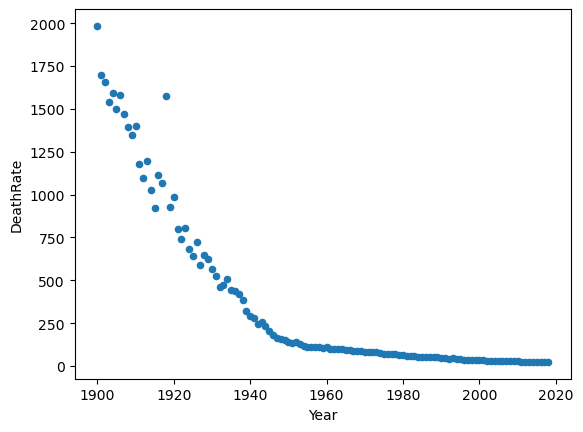

In [4]:
mortality_data.query('AgeGroup == "01-04 Years"').plot.scatter(x='Year', y='DeathRate')

<Axes: xlabel='Year'>

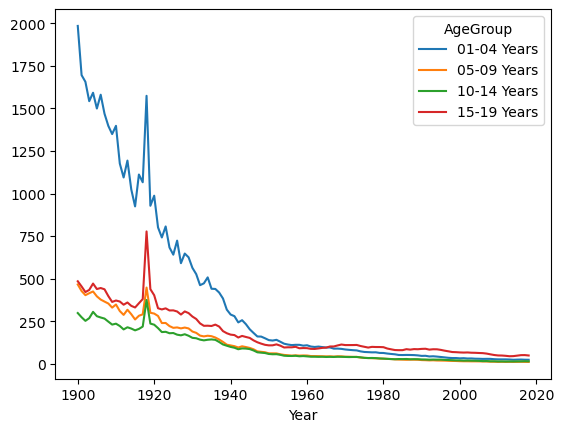

In [5]:
mortality_wide.plot()

<Axes: title={'center': 'Mortality Rate for Age Group 15-19 Years'}, xlabel='Year'>

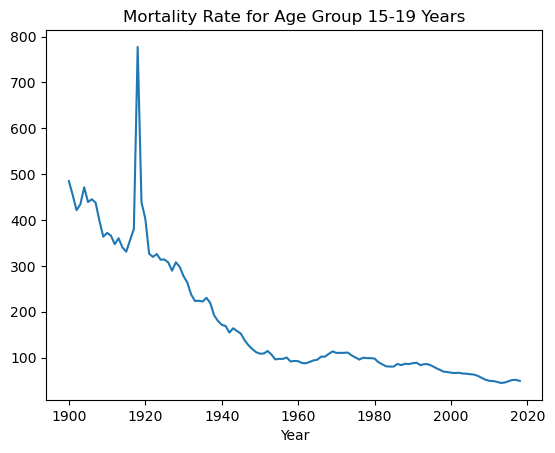

In [6]:
(mortality_wide['15-19 Years']
    .plot(kind='line', title='Mortality Rate for Age Group 15-19 Years', legend=False))

<Axes: xlabel='Year'>

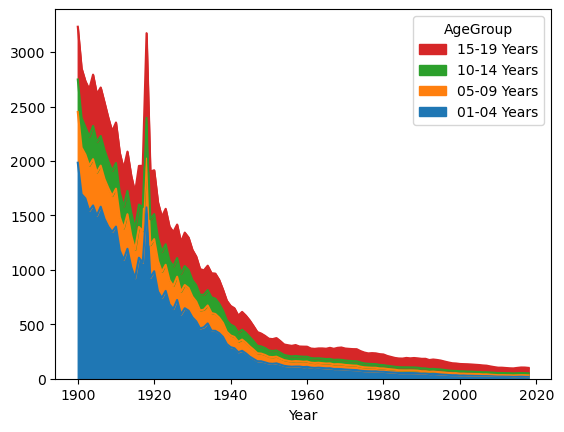

In [7]:
mortality_wide.plot(kind='area', legend='reverse')

Text(0.5, 0, 'Age Group')

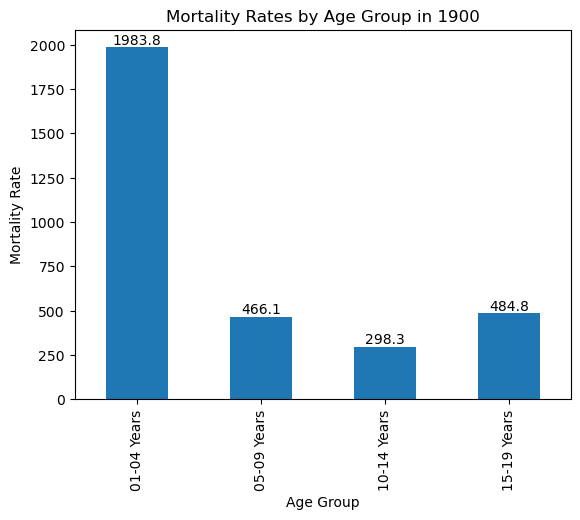

In [8]:
mortality_1900 = mortality_wide.loc[1900]
ax = mortality_1900.plot(kind='bar', title='Mortality Rates by Age Group in 1900')
for p in ax.patches:
    ax.annotate(str(round(p.get_height(), 2)), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')
ax.set_ylabel('Mortality Rate')
ax.set_xlabel('Age Group')

Text(0, 0.5, 'Mortality Rate')

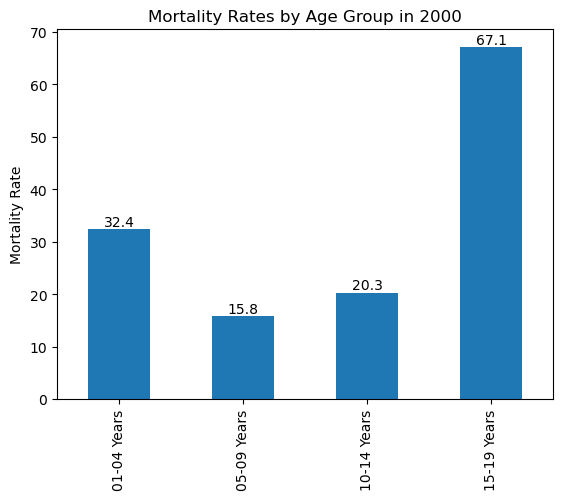

In [9]:
mortality_2000 = mortality_wide.loc[2000]
ax = mortality_2000.plot(kind='bar', title='Mortality Rates by Age Group in 2000')
for p in ax.patches:
    ax.annotate(str(round(p.get_height(), 2)), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')
ax.set_xlabel(None)
ax.set_ylabel('Mortality Rate')

Text(0, 0.5, 'Mortality Rate')

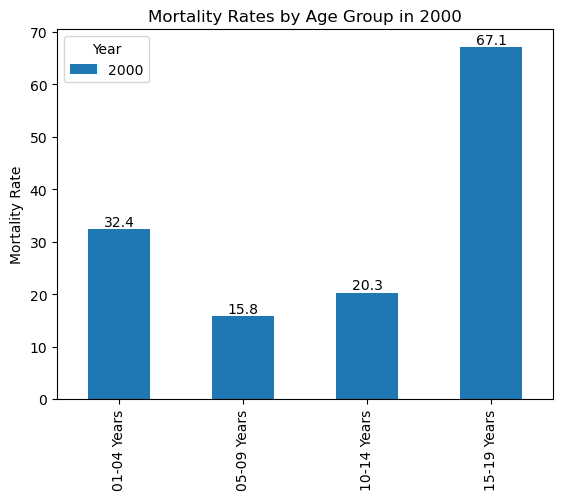

In [10]:
mortality_long_2000 = mortality_data.query('Year == 2000').pivot(index='AgeGroup', columns='Year', values='DeathRate')
ax = mortality_long_2000.plot(kind='bar', title='Mortality Rates by Age Group in 2000')
for p in ax.patches:
    ax.annotate(str(round(p.get_height(), 2)), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')
ax.set_xlabel(None)
ax.set_ylabel('Mortality Rate')

<Axes: title={'center': 'Frequency of Death Rates'}, ylabel='Frequency'>

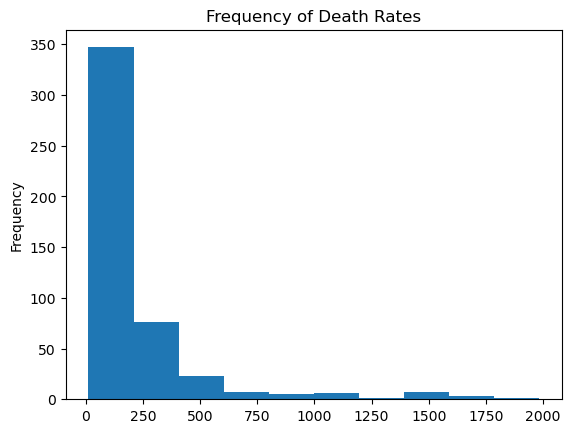

In [11]:
mortality_data['DeathRate'].plot.hist(title='Frequency of Death Rates')

<Axes: title={'center': 'Frequency of Death Rates'}, ylabel='Frequency'>

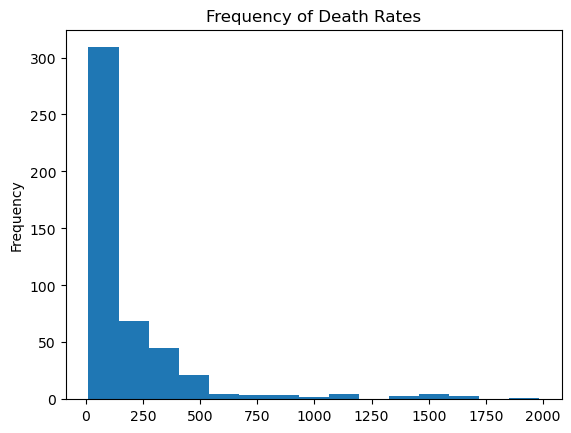

In [12]:
mortality_data['DeathRate'].plot.hist(bins=15, title='Frequency of Death Rates')

<Axes: title={'center': 'Distribution of Death Rates in 1900'}, ylabel='Density'>

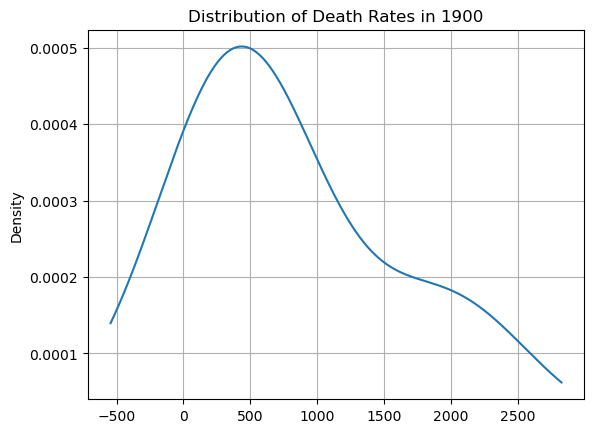

In [13]:
mortality_1900 = mortality_data[mortality_data['Year'] == 1900]
mortality_1900['DeathRate'].plot.kde(grid=True, title= 'Distribution of Death Rates in 1900')

<Axes: ylabel='DeathRate'>

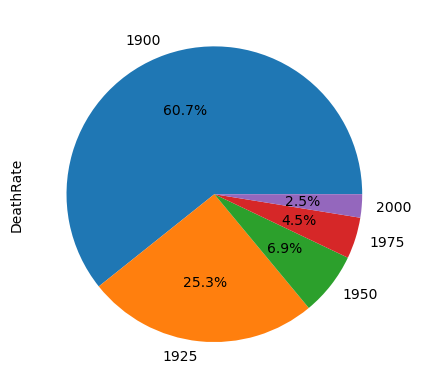

In [14]:
years_of_interest = [1900, 1925, 1950, 1975, 2000]
mortality_filtered = mortality_data[mortality_data['Year'].isin(years_of_interest)]
sum_of_death_rates = mortality_filtered.groupby('Year')['DeathRate'].sum()
sum_of_death_rates.plot(kind='pie', autopct='%1.1f%%')

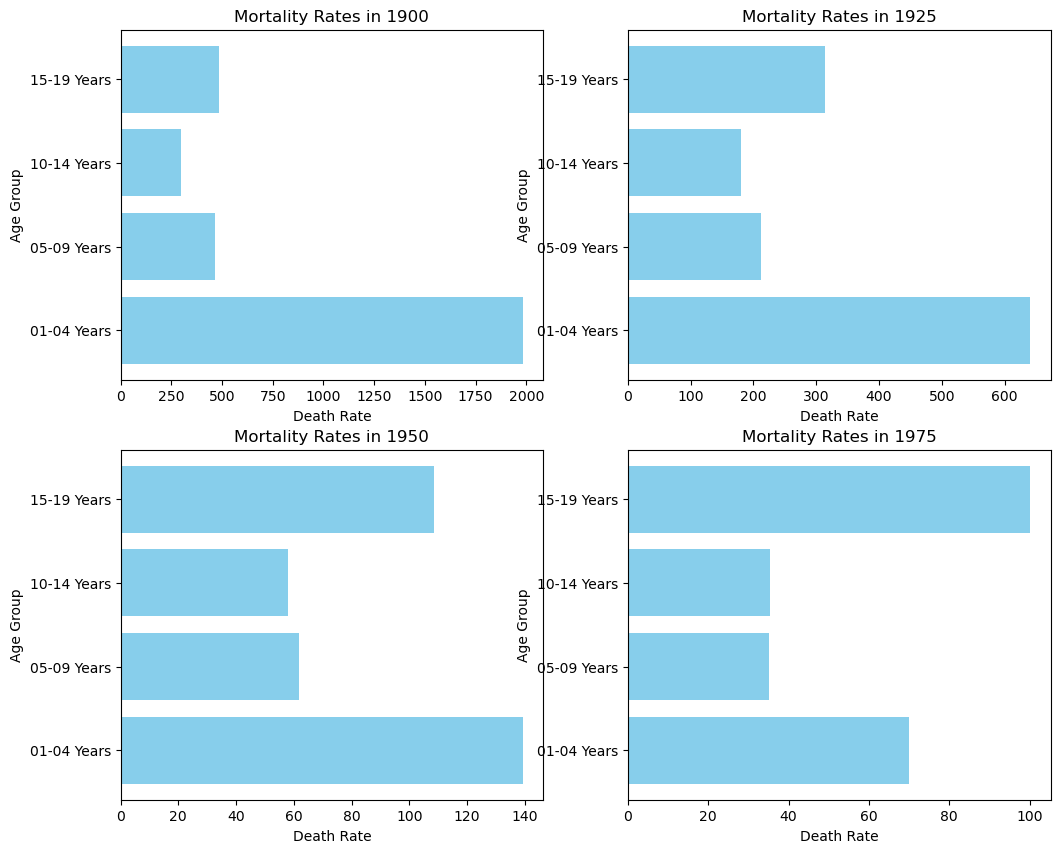

In [16]:
import matplotlib.pyplot as plt
years_to_plot = [1900, 1925, 1950, 1975, 2000]
mortality_subset = mortality_wide.loc[years_to_plot]
age_groups = mortality_subset.columns
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
for i, ax in enumerate(axes.flat):
    year = years_to_plot[i]
    data = mortality_subset.loc[year]
    ax.barh(age_groups, data, color='skyblue')
    ax.set_title(f'Mortality Rates in {year}')
    ax.set_xlabel('Death Rate')
    ax.set_ylabel('Age Group')